# Segmentación de imagenes.

Este es un modelo que se encarga de realizar segmentaciones en las imagenes que pasan porl el, separando los objetos y las personas que se pueden ver en cada una de las imagenes.

## !. Importe de librerias a usar.

In [1]:
import cv2 as cv # Libreria para cargar las imagenes.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Modelo KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth  # Modelo Mean Shift con ancho de banda optimo para el agrupamiento.

## 2. Creamos una función para realizar segmentación de imagenes usando K-means.

In [2]:
def segment_with_kmeans(image, k):
    # Redimensionar la imagen para trabajar con los píxeles como características
    pixel_values = image.reshape((-1, 3))
    
    # Inicializar el modelo K-means
    kmeans = KMeans(n_clusters=k)
    
    # Ajustar el modelo a los datos de píxeles
    kmeans.fit(pixel_values)
    
    # Obtener las etiquetas de los grupos y los centros de los grupos
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]*255
    
    # Redimensionar la imagen segmentada a su forma original
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image

**Explicación del script:** 

**pixel_values = image.reshape((-1, 3))**
la función 'reshape' se utiliza para cambiar la forma de un array sin cambiar sus datos.

"image" es la matriz que representa la imagen.

-1 es una marcador especial que indica a numpy que debe calcular automáticamente el tamaño de esa dimensión. Para que el total de elementos sea el mismo que el tamaño original de la matriz "image".

En este caso se le esta diciendo a la función, que en la variable pixel_values almacene una matriz en donde se definen tres columnas, en las cuales sera donde se representen los volores RGB y tendra un numero desconocido de filas, las cuales tendran el total de elementos de la image original (pixeles).

**kmeans = KMeans(n_clusters=k)** creamos la instancia K-means para inicializar nuestro modelo acorde al numero de clusters que deseo tener, que en este caso serian el valor que se le asigne a k posteriormente.

**kmeans.fit(pixel_values)** Ajusta el modelo con los datos de los pixeles.


## 3. Creamos una función para realizar segmentación de imagenes usando Mean Shift.

In [3]:
def segment_with_meanshift(image):
    # Convertir la imagen de BGR a RGB
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    # Obtener las dimensiones de la imagen
    rows, cols, _ = image_rgb.shape
    
    # Redimensionar la imagen para trabajar con los píxeles como características
    pixel_values = image_rgb.reshape((-1, 3))
    
    # Calcular el ancho de banda utilizando la función estimate_bandwidth
    bandwidth = estimate_bandwidth(pixel_values, quantile=0.2, n_samples=500)
    
    # Inicializar el modelo Mean Shift
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    
    # Ajustar el modelo a los datos de píxeles
    ms.fit(pixel_values)
    
    # Obtener las etiquetas de los grupos y los centros de los grupos
    labels = ms.labels_
    centers = ms.cluster_centers_
    
    # Asignar a cada píxel el color del centro de su grupo
    segmented_image = np.zeros_like(pixel_values)
    for i in range(len(pixel_values)):
        segmented_image[i] = centers[labels[i]]
    
    # Redimensionar la imagen segmentada a su forma original
    segmented_image = segmented_image.reshape((rows, cols, 3))
    
    return segmented_image


In [4]:
# Función para cargar y mostrar imágenes
def load_and_show_images(original_image_path, segmented_image):
    # Cargar la imagen original
    original_image = cv.imread(original_image_path)
    original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)
    
    # Mostrar la imagen original
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Imagen Original')
    plt.axis('off')
    
    # Mostrar la imagen segmentada
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image.astype(np.uint8))
    plt.title('Imagen Segmentada')
    plt.axis('off')
    
    plt.show()

In [12]:
# Cargar la imagen
original_image_path = r'imgs\abby_road.jpg'
image = cv.imread(original_image_path)

# Segmentar con K-means
k = 5  # Número de grupos
segmented_image_kmeans = segment_with_kmeans(image, k)

# Segmentar con Mean Shift
segmented_image_meanshift = segment_with_meanshift(image)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
image

array([[[255, 218, 199],
        [255, 218, 199],
        [255, 216, 198],
        ...,
        [114,  55,  39],
        [114,  60,  43],
        [115,  63,  47]],

       [[251, 208, 189],
        [250, 207, 188],
        [252, 206, 188],
        ...,
        [107,  53,  36],
        [112,  62,  44],
        [120,  71,  55]],

       [[246, 204, 185],
        [245, 203, 184],
        [245, 202, 183],
        ...,
        [113,  67,  50],
        [114,  71,  54],
        [115,  75,  57]],

       ...,

       [[114,  98,   0],
        [114,  98,   0],
        [114,  97,   0],
        ...,
        [ 85, 105,  93],
        [ 73,  95,  83],
        [ 63,  88,  78]],

       [[113,  98,   0],
        [113,  98,   0],
        [113,  97,   0],
        ...,
        [ 82,  97,  89],
        [ 84, 101,  92],
        [ 81,  97,  90]],

       [[113,  98,   0],
        [113,  98,   0],
        [111,  98,   0],
        ...,
        [108, 121, 113],
        [ 91, 104,  96],
        [ 60,  74,  70]]

In [10]:
image.reshape((-1, 3)).shape

(50232, 3)

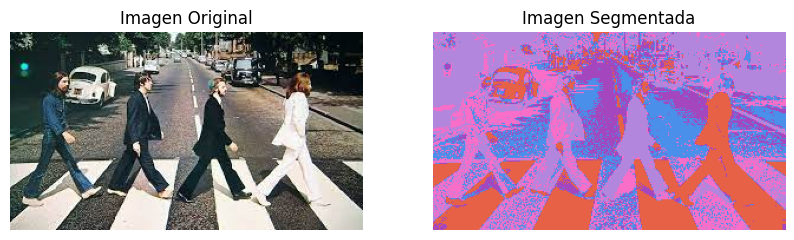

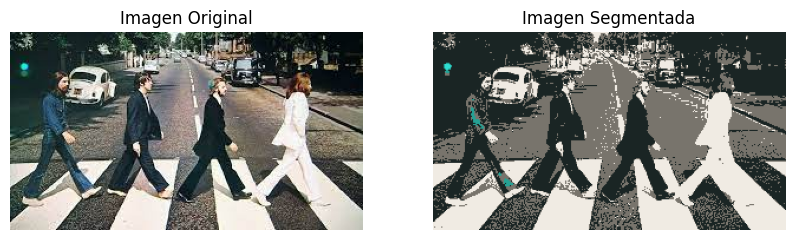

In [13]:
# Mostrar las imágenes originales y segmentadas
load_and_show_images(original_image_path, segmented_image_kmeans)
load_and_show_images(original_image_path, segmented_image_meanshift)